In [1]:
import pandas as pd
%matplotlib inline

In [2]:
cuprum = pd.read_csv('data/VC-CUPRUM.csv', index_col=0, parse_dates=True)
habitad = pd.read_csv('data/VC-HABITAT.csv', index_col=0, parse_dates=True)
modelo = pd.read_csv('data/VC-MODELO.csv', index_col=0, parse_dates=True)

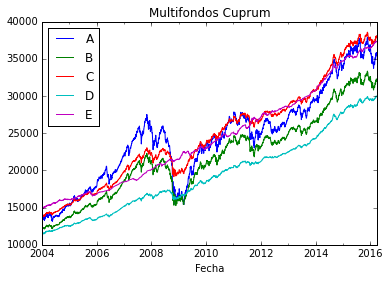

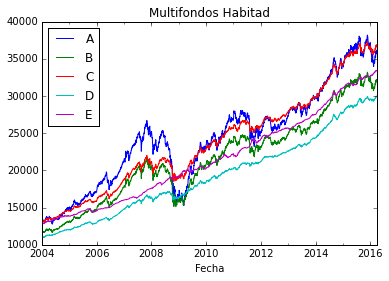

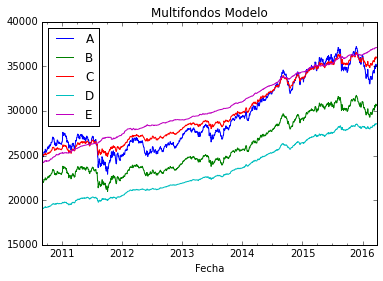

In [3]:
cuprum['2004-01-01':].plot(title='Multifondos Cuprum')
habitad['2004-01-01':].plot(title='Multifondos Habitad')
modelo['2004-01-01':].plot(title='Multifondos Modelo')

In [4]:
cuprum['delta'] = cuprum.A - cuprum.E
habitad['delta'] = habitad.A - habitad.E
modelo['delta'] = modelo.A - modelo.E

In [5]:
# Nivel indiferencia riesgo arbitrario, podría delta inicial, media, perc 50, media movil 365, etc.
# Supuesto valor relativo fondo A comparable con E
cuprum['zero'] = cuprum.delta.rolling(window=365,center=False).median()
habitad['zero'] = habitad.delta.rolling(window=365,center=False).median()
modelo['zero'] = modelo.delta.rolling(window=365,center=False).median()
# También podría ser un escalar
cuprum_zero = cuprum.zero
habitad_zero = habitad.zero
modelo_zero = modelo.zero

In [6]:
#cuprum['riesgo'] = ['bajo' if x < cuprum_zero else 'alto' for x in cuprum.delta]
cuprum['riesgo'] = pd.np.where(cuprum['delta'] < cuprum['zero'], 'bajo', 'alto')
cuprum['bajo'] = cuprum.delta[cuprum.delta<cuprum_zero]
cuprum['alto'] = cuprum.delta[cuprum.delta>cuprum_zero]

In [7]:
#habitad['riesgo'] = ['bajo' if x < habitad_zero else 'alto' for x in habitad.delta]
habitad['riesgo'] = pd.np.where(habitad['delta'] < habitad['zero'], 'bajo', 'alto')
habitad['bajo'] = habitad.delta[habitad.delta<habitad_zero]
habitad['alto'] = habitad.delta[habitad.delta>habitad_zero]

In [8]:
#modelo['riesgo'] = ['bajo' if x < modelo_zero else 'alto' for x in modelo.delta]
modelo['riesgo'] = pd.np.where(modelo['delta'] < modelo['zero'], 'bajo', 'alto')
modelo['bajo'] = modelo.delta[modelo.delta<modelo_zero]
modelo['alto'] = modelo.delta[modelo.delta>modelo_zero]

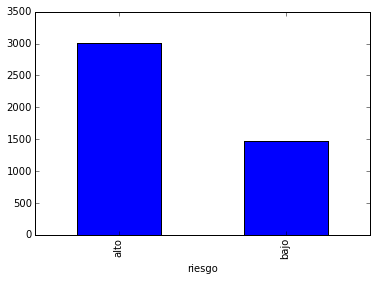

In [9]:
cuprum['2004-01-01':].groupby('riesgo').count()['delta'].plot(kind='bar')

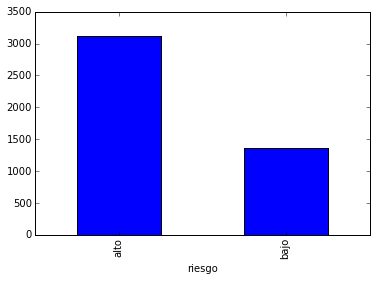

In [10]:
habitad['2004-01-01':].groupby('riesgo').count()['delta'].plot(kind='bar')

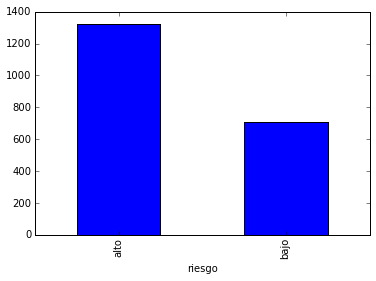

In [11]:
modelo['2004-01-01':].groupby('riesgo').count()['delta'].plot(kind='bar')

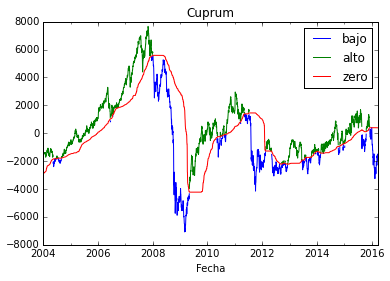

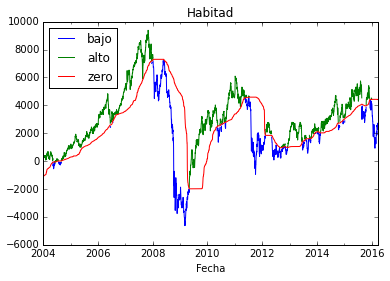

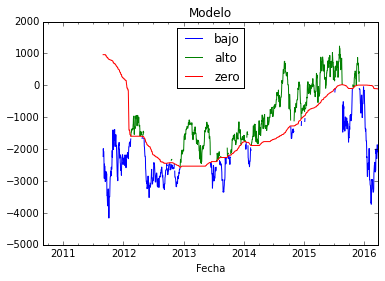

In [12]:
cuprum.loc['2004-01-01':,['bajo','alto','zero']].plot(title='Cuprum')
habitad.loc['2004-01-01':,['bajo','alto','zero']].plot(title='Habitad')
modelo.loc['2004-01-01':,['bajo','alto','zero']].plot(title='Modelo')

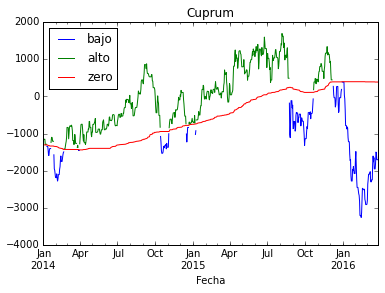

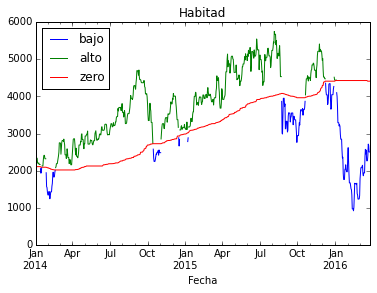

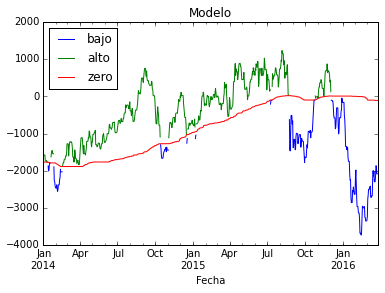

In [13]:
cuprum.loc['2014-01-01':,['bajo','alto','zero']].plot(title='Cuprum')
habitad.loc['2014-01-01':,['bajo','alto','zero']].plot(title='Habitad')
modelo.loc['2014-01-01':,['bajo','alto','zero']].plot(title='Modelo')

### Análisis delta Cuprum

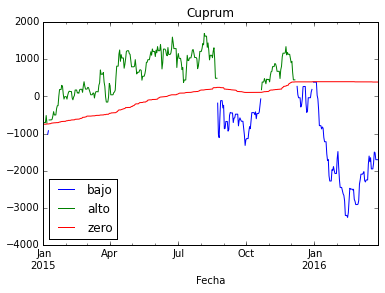

In [14]:
cuprum.loc['2015-01-01':,['bajo','alto','zero']].plot(title='Cuprum')

In [15]:
print 'Inicio A-E Cuprum:', cuprum.delta[cuprum.A.first_valid_index()]

Inicio A-E Cuprum: -3408.81


In [16]:
print 'A-E Cuprum:'
print cuprum.delta.describe()

A-E Cuprum:
count    4988.000000
mean     -240.266546
std      2641.878158
min     -7077.670000
25%     -1955.125000
50%      -597.195000
75%      1202.300000
max      7658.530000
Name: delta, dtype: float64


### Análisis delta Habitad

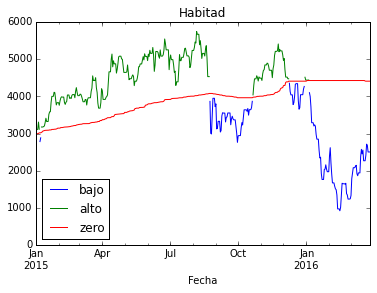

In [17]:
habitad.loc['2015-01-01':,['bajo','alto','zero']].plot(title='Habitad')

In [18]:
print 'Inicio A-E Habitad:', habitad.delta[habitad.A.first_valid_index()]

Inicio A-E Habitad: -1778.23


In [19]:
print 'A-E Habitad:'
print habitad.delta.describe()

A-E Habitad:
count    4988.000000
mean     2327.923250
std      2612.731108
min     -4624.590000
25%       641.465000
50%      2346.430000
75%      4024.850000
max      9379.510000
Name: delta, dtype: float64


### Análisis delta Modelo

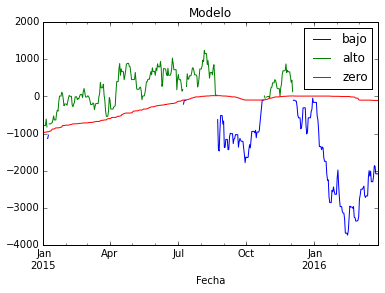

In [20]:
modelo.loc['2015-01-01':,['bajo','alto','zero']].plot(title='Modelo')

In [21]:
print 'Inicio A-E Modelo:', modelo.delta[modelo.A.first_valid_index()]

Inicio A-E Modelo: 408.54


In [22]:
print 'A-E Modelo:'
print modelo.delta.describe()

A-E Modelo:
count    2035.000000
mean    -1054.643818
std      1413.231728
min     -4161.220000
25%     -2249.015000
50%     -1308.680000
75%       152.545000
max      2346.410000
Name: delta, dtype: float64


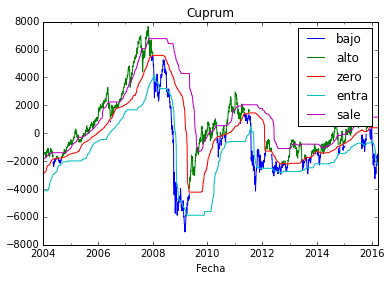

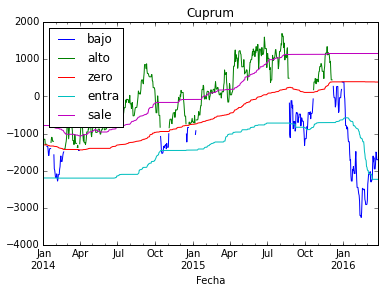

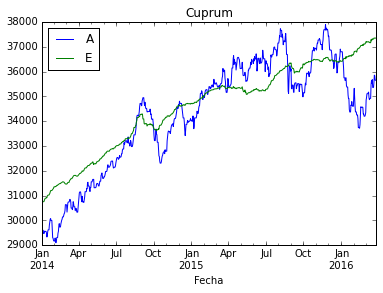

In [23]:
cuprum['entra'] = cuprum.delta.rolling(window=365,center=False).quantile(quantile=0.1)
cuprum['sale'] = cuprum.delta.rolling(window=365,center=False).quantile(quantile=0.85)
cuprum.loc['2004-01-01':,['bajo','alto','zero','entra','sale']].plot(title='Cuprum')
cuprum.loc['2014-01-01':,['bajo','alto','zero','entra','sale']].plot(title='Cuprum')
cuprum.loc['2014-01-01':,['A','E']].plot(title='Cuprum')
## Estrategia de cambio de Fondo
# Si estoy en el Fondo E:
    # Si delta < bajo and delta = entra and riesgo sistemico bajo
        # Cambio de E -> A
# Si estoy en el Fondo A:
    # Si delta > zero and delta = sale
        # Cambio de A -> E


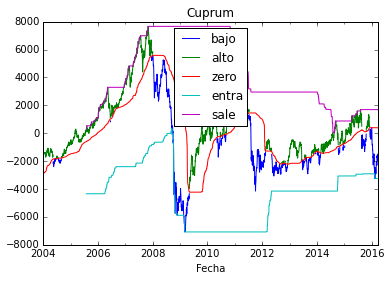

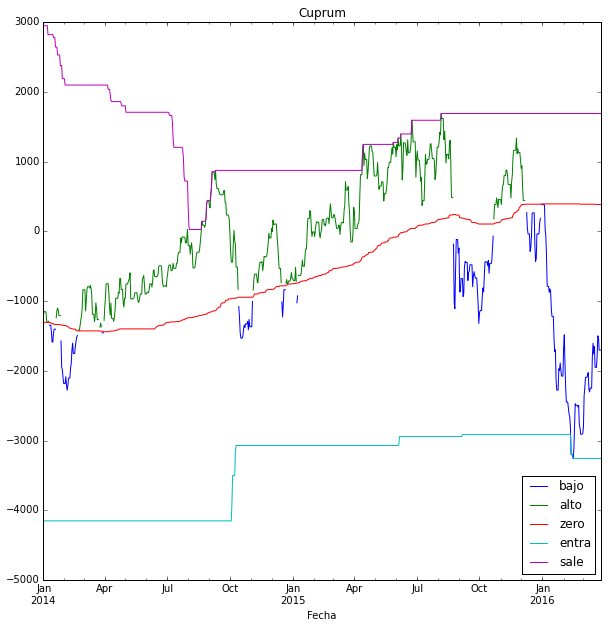

In [24]:
cuprum['entra'] = cuprum.delta.rolling(window=365*3,center=False).min()
cuprum['sale'] = cuprum.delta.rolling(window=365*3,center=False).max()
cuprum.loc['2004-01-01':,['bajo','alto','zero','entra','sale']].plot(title='Cuprum')
cuprum.loc['2014-01-01':,['bajo','alto','zero','entra','sale']].plot(title='Cuprum', figsize=[10,10])

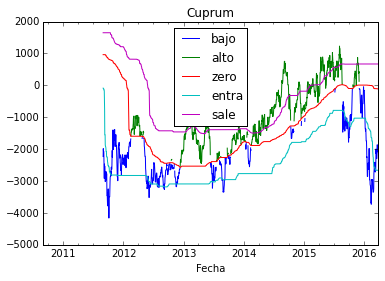

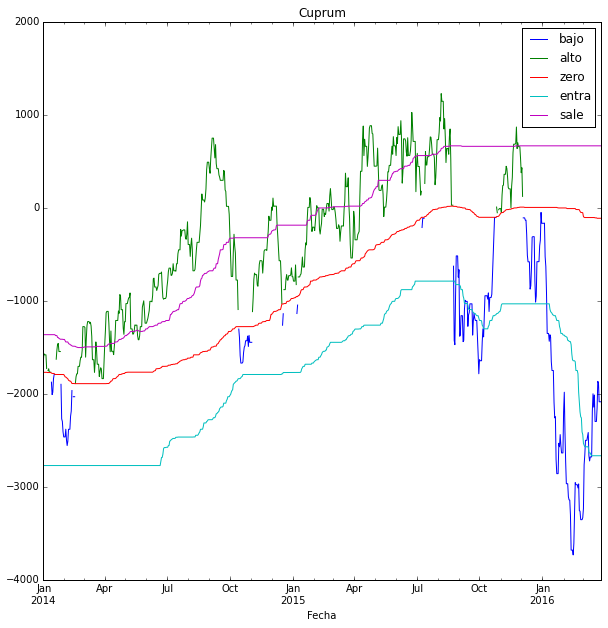

In [25]:
modelo['entra'] = modelo.delta.rolling(window=365,center=False).quantile(quantile=0.1)
modelo['sale'] = modelo.delta.rolling(window=365,center=False).quantile(quantile=0.85)
modelo.loc['2004-01-01':,['bajo','alto','zero','entra','sale']].plot(title='Cuprum')
modelo.loc['2014-01-01':,['bajo','alto','zero','entra','sale']].plot(title='Cuprum', figsize=[10,10])

In [26]:
import pandas_datareader.data as web
import Quandl

with open('token.txt', 'r') as f:
    token = f.readline().rstrip('\n')
# Indicadores de Riesgo sistémico
dow = Quandl.get('BCB/UDJIAD1', authtoken=token)
wti = Quandl.get('EIA/PET_RWTC_D', authtoken=token)
fedrate = web.DataReader("FEDFUNDS", 'fred', start=pd.datetime(1955,1,1))

In [27]:
df = pd.DataFrame()
df['dow'] = dow.Value
df['wti'] = wti.Value
df['fed'] = fedrate.FEDFUNDS.resample('D').bfill()
df['A'] = cuprum.A

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001150E4A8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D2369B0>], dtype=object)

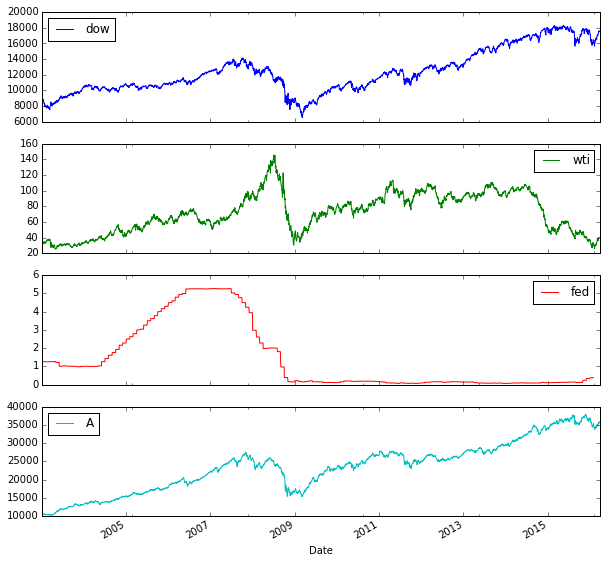

In [28]:
df['2003':].plot(subplots=True, figsize=(10, 10), sharex=True)

In [29]:
# %qtconsole